<a href="https://colab.research.google.com/github/Divya-Juhi-Singh/Social_Media_Content_Verification/blob/main/Social_Media_Content_Verification(English).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import numpy as np
import pandas as pd
import seaborn as sns 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
tds = pd.read_csv("/content/drive/MyDrive/Fake_News_Detection/True.csv.zip")
fds = pd.read_csv("/content/drive/MyDrive/Fake_News_Detection/Fake.csv.zip")

In [63]:
tds = tds.drop(['title'],axis=1)
tds

,text,subject,date
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [64]:
class_true = ["Real"]*21417
tds["class_label"] = class_true
tds

,text,subject,date,class_label
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real
...,...,...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",Real
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",Real
21414,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",Real
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Real


In [65]:
fds = fds.drop(['title'],axis=1)
fds

,text,subject,date
0,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [66]:
class_fake = ["Fake"]*23481
fds["class_label"] = class_fake
fds

,text,subject,date,class_label
0,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


###Preprocessing

In [67]:
#Punctuations removal 
tweets_dataset = pd.concat([tds,fds], axis=0)
index = [i for i in range(len(tweets_dataset))]
tweets_dataset["index"] = index
tweets_dataset.set_index('index',inplace=True)

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

tweets_dataset['text'] = tweets_dataset['text'].apply(punctuation_removal)

# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets_dataset['text'] = tweets_dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# converting to all lowercase
tweets_dataset['text'] = tweets_dataset['text'].apply(lambda x: x.lower())

tweets_dataset.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,subject,date,class_label
index,,,,
0,washington reuters the head conservative repub...,politicsNews,"December 31, 2017",Real
1,washington reuters transgender people allowed ...,politicsNews,"December 29, 2017",Real
2,washington reuters the special counsel investi...,politicsNews,"December 31, 2017",Real
3,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",Real
4,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",Real


In [68]:
tweets_dataset = tweets_dataset.sample(frac=1)#shuffled dataset
tweets_dataset

,text,subject,date,class_label
index,,,,
14431,harare reuters zimbabwe zbc state broadcaster ...,worldnews,"November 19, 2017",Real
33744,there records available year unclear cast memb...,politics,"Nov 22, 2016",Fake
125,washington reuters the top us senate democrat ...,politicsNews,"December 15, 2017",Real
14359,nairobi reuters kenya supreme court monday uph...,worldnews,"November 20, 2017",Real
11553,beijing reuters a country right choose develop...,worldnews,"December 22, 2017",Real
...,...,...,...,...
3692,washington reuters three us democratic senator...,politicsNews,"May 19, 2017",Real
33439,don lemon wasted doing shots air getting ear p...,politics,"Jan 1, 2017",Fake
2937,reuters maine governor paul lepage said friday...,politicsNews,"June 30, 2017",Real


In [69]:
tweets_dataset.class_label.value_counts()

Fake    23481
Real    21417
Name: class_label, dtype: int64

In [70]:
tweets_dataset["class_label_num"] = tweets_dataset["class_label"].map({"Fake":0,"Real":1})
tweets_dataset

,text,subject,date,class_label,class_label_num
index,,,,,
14431,harare reuters zimbabwe zbc state broadcaster ...,worldnews,"November 19, 2017",Real,1
33744,there records available year unclear cast memb...,politics,"Nov 22, 2016",Fake,0
125,washington reuters the top us senate democrat ...,politicsNews,"December 15, 2017",Real,1
14359,nairobi reuters kenya supreme court monday uph...,worldnews,"November 20, 2017",Real,1
11553,beijing reuters a country right choose develop...,worldnews,"December 22, 2017",Real,1
...,...,...,...,...,...
3692,washington reuters three us democratic senator...,politicsNews,"May 19, 2017",Real,1
33439,don lemon wasted doing shots air getting ear p...,politics,"Jan 1, 2017",Fake,0
2937,reuters maine governor paul lepage said friday...,politicsNews,"June 30, 2017",Real,1


## Exploration & Data Analysis

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


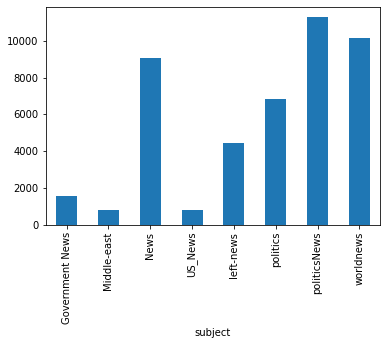

In [71]:
# How many articles per subject?
print(tweets_dataset.groupby(['subject'])['text'].count())
tweets_dataset.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

class_label
Fake    23481
Real    21417
Name: text, dtype: int64


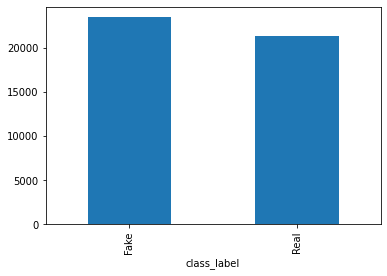

In [72]:
# How many fake and real articles?
print(tweets_dataset.groupby(['class_label'])['text'].count())
tweets_dataset.groupby(['class_label'])['text'].count().plot(kind="bar")
plt.show()

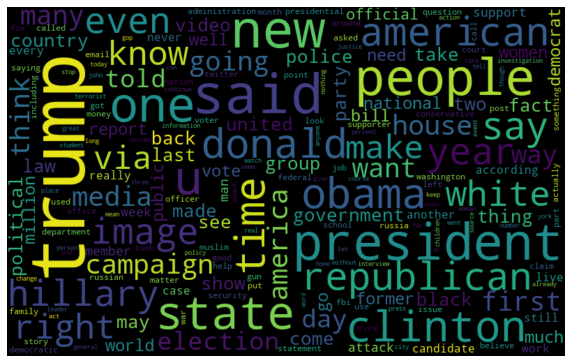

In [73]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = tweets_dataset[tweets_dataset["class_label"] == "Fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

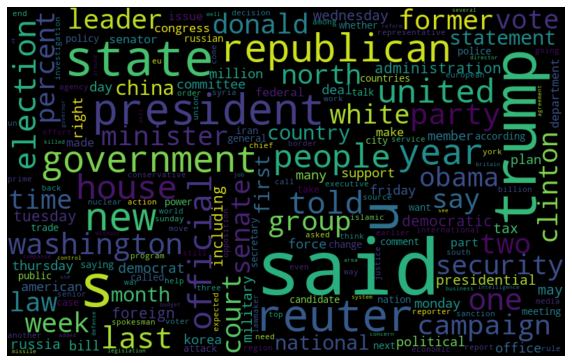

In [74]:
# Word cloud for real news
from wordcloud import WordCloud

fake_data = tweets_dataset[tweets_dataset["class_label"] == "Real"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [75]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

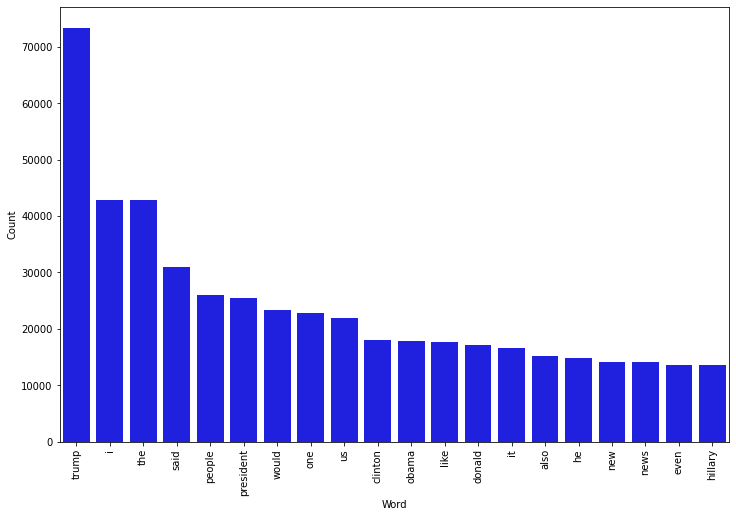

In [76]:
# Most frequent words in fake news
counter(tweets_dataset[tweets_dataset["class_label"] == "Fake"], "text", 20)

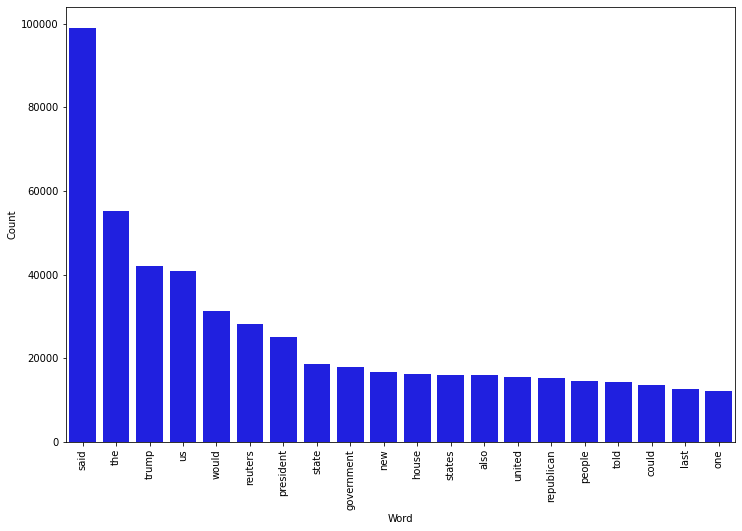

In [77]:
# Most frequent words in real news
counter(tweets_dataset[tweets_dataset["class_label"] == "Real"], "text", 20)

###Word To Vector Generation

In [78]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import spacy
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [80]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score >0:
    return 'Positive'

tweets_dataset["Polarity"]=tweets_dataset["text"].apply(getPolarity)
tweets_dataset["Sentiment"]=tweets_dataset["Polarity"].apply(getAnalysis)
tweets_dataset

,text,subject,date,class_label,class_label_num,Polarity,Sentiment
index,,,,,,,
14431,harare reuters zimbabwe zbc state broadcaster ...,worldnews,"November 19, 2017",Real,1,0.000000,Neutral
33744,there records available year unclear cast memb...,politics,"Nov 22, 2016",Fake,0,0.236364,Positive
125,washington reuters the top us senate democrat ...,politicsNews,"December 15, 2017",Real,1,0.048314,Positive
14359,nairobi reuters kenya supreme court monday uph...,worldnews,"November 20, 2017",Real,1,-0.001423,Negative
11553,beijing reuters a country right choose develop...,worldnews,"December 22, 2017",Real,1,0.018481,Positive
...,...,...,...,...,...,...,...
3692,washington reuters three us democratic senator...,politicsNews,"May 19, 2017",Real,1,0.093056,Positive
33439,don lemon wasted doing shots air getting ear p...,politics,"Jan 1, 2017",Fake,0,-0.212500,Negative
2937,reuters maine governor paul lepage said friday...,politicsNews,"June 30, 2017",Real,1,0.087433,Positive


In [81]:
tweets_dataset["text_vec"]=tweets_dataset["text"].apply(lambda text: nlp(text).vector)
tweets_dataset

,text,subject,date,class_label,class_label_num,Polarity,Sentiment,text_vec
index,,,,,,,,
14431,harare reuters zimbabwe zbc state broadcaster ...,worldnews,"November 19, 2017",Real,1,0.000000,Neutral,"[-1.0127505, -0.034691792, -1.7458487, 0.78763..."
33744,there records available year unclear cast memb...,politics,"Nov 22, 2016",Fake,0,0.236364,Positive,"[-0.7516487, 0.1266459, -1.1681546, 0.08591817..."
125,washington reuters the top us senate democrat ...,politicsNews,"December 15, 2017",Real,1,0.048314,Positive,"[-0.48117712, 1.3793999, -1.6744037, 0.2957711..."
14359,nairobi reuters kenya supreme court monday uph...,worldnews,"November 20, 2017",Real,1,-0.001423,Negative,"[-1.344959, 0.1746834, -1.6144629, 1.0341218, ..."
11553,beijing reuters a country right choose develop...,worldnews,"December 22, 2017",Real,1,0.018481,Positive,"[-0.87445134, 0.15088817, -1.5410383, 0.724625..."
...,...,...,...,...,...,...,...,...
3692,washington reuters three us democratic senator...,politicsNews,"May 19, 2017",Real,1,0.093056,Positive,"[-0.61087865, 0.6251564, -0.73851883, -0.00334..."
33439,don lemon wasted doing shots air getting ear p...,politics,"Jan 1, 2017",Fake,0,-0.212500,Negative,"[-0.023851033, 1.4021524, -0.27747837, 0.18444..."
2937,reuters maine governor paul lepage said friday...,politicsNews,"June 30, 2017",Real,1,0.087433,Positive,"[-0.87770987, 0.8417612, -2.2181437, 0.4636489..."


In [82]:
tweets_dataset["text_vec"]

index
14431    [-1.0127505, -0.034691792, -1.7458487, 0.78763...
33744    [-0.7516487, 0.1266459, -1.1681546, 0.08591817...
125      [-0.48117712, 1.3793999, -1.6744037, 0.2957711...
14359    [-1.344959, 0.1746834, -1.6144629, 1.0341218, ...
11553    [-0.87445134, 0.15088817, -1.5410383, 0.724625...
                               ...                        
3692     [-0.61087865, 0.6251564, -0.73851883, -0.00334...
33439    [-0.023851033, 1.4021524, -0.27747837, 0.18444...
2937     [-0.87770987, 0.8417612, -2.2181437, 0.4636489...
10713    [0.09345425, 1.718488, -2.1180167, -0.23120077...
2734     [-0.59230655, 1.1194148, -1.8458726, 0.6257725...
Name: text_vec, Length: 44898, dtype: object

In [83]:
tweet_train, tweet_test, label_train, label_test = train_test_split(tweets_dataset.text_vec.values, tweets_dataset.class_label_num, test_size=0.2, random_state=2022)

In [84]:
tweet_train_2D = np.stack(tweet_train)
tweet_test_2D = np.stack(tweet_test)


In [85]:
"""
https://www.researchgate.net/post/what_are_the_different_algorithms_for_text_classification

Some Traditional ML Algorithms:
Logisitic Regression, Multinomial Naive Bayes, k Nearest Neighbors, Decision Tree and Support Vector Machine
Some Ensemble ML Algorithms are:
Adaboost, Random Forest, Bagging, Gradient Boosting etc
deep learning ones: 
Convolutional Neural Network (CNN), Long Short Term Modelr (LSTM), Recurrent Convolutional Neural Network (RCNN), etc
"""

'\nhttps://www.researchgate.net/post/what_are_the_different_algorithms_for_text_classification\n\nSome Traditional ML Algorithms:\nLogisitic Regression, Multinomial Naive Bayes, k Nearest Neighbors, Decision Tree and Support Vector Machine\nSome Ensemble ML Algorithms are:\nAdaboost, Random Forest, Bagging, Gradient Boosting etc\ndeep learning ones: \nConvolutional Neural Network (CNN), Long Short Term Modelr (LSTM), Recurrent Convolutional Neural Network (RCNN), etc\n'

In [86]:
models= dict()

In [87]:
mnb = MultinomialNB()
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(tweet_train_2D) #Negative values in data passed to MultinomialNB (input X)
scaled_test = scaler.transform(tweet_test_2D)
mnb.fit(scaled_train, label_train) # scaled to get positive range of numbers for pos & neg data

MultinomialNB()

In [88]:
label_pred = mnb.predict(scaled_test)
print(classification_report(label_test, label_pred))
print("accuracy: {}%".format(round(accuracy_score(label_test, label_pred)*100,2)))
models['MultinomialNB()']=round(accuracy_score(label_test, label_pred)*100,2)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4734
           1       0.90      0.89      0.89      4246

    accuracy                           0.90      8980
   macro avg       0.90      0.90      0.90      8980
weighted avg       0.90      0.90      0.90      8980

accuracy: 90.04%


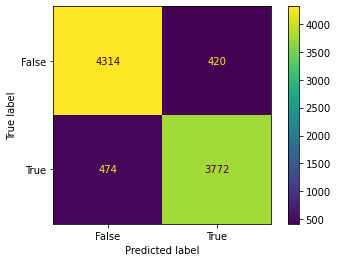

In [89]:
confusion_matrix_mnb = confusion_matrix(label_test, label_pred)

cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mnb, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [90]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(tweet_train_2D, label_train)

KNeighborsClassifier(metric='euclidean')

In [91]:
label_pred_knn = knn.predict(tweet_test_2D)
print(classification_report(label_test, label_pred_knn))
print("accuracy: {}%".format(round(accuracy_score(label_test, label_pred_knn)*100,2)))
models['KNN']=round(accuracy_score(label_test, label_pred_knn)*100,2)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4734
           1       0.98      0.96      0.97      4246

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980

accuracy: 97.31%


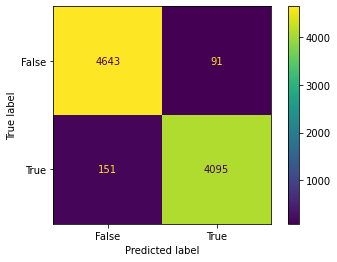

In [92]:
confusion_matrix_knn = confusion_matrix(label_test, label_pred_knn)

cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [93]:
#lr = LogisticRegression()
#lr.fit(tweet_train_2D, label_train) #ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In [94]:
sv = svm.SVC()
sv.fit(tweet_train_2D, label_train)

SVC()

In [95]:
label_pred_sv = sv.predict(tweet_test_2D)
print(classification_report(label_test, label_pred_sv))
print("accuracy: {}%".format(round(accuracy_score(label_test, label_pred_sv)*100,2)))
models['SVM']=round(accuracy_score(label_test, label_pred_sv)*100,2)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4734
           1       0.98      0.98      0.98      4246

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

accuracy: 98.43%


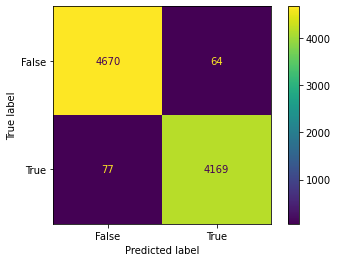

In [96]:
confusion_matrix_sv = confusion_matrix(label_test, label_pred_sv)

cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_sv, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [97]:
randfor = RandomForestClassifier(max_depth=14, random_state=2022) # at max_depth 14, acc is max, no inc after that
#The random_state in these algorithms controls two randomized processes — bootstrapping of the samples when creating tress and getting a random subset of features to search for the best feature during the node splitting process when creating each tree.
randfor.fit(tweet_train_2D, label_train)

RandomForestClassifier(max_depth=14, random_state=2022)

In [98]:
label_pred_randfor = randfor.predict(tweet_test_2D)
print(classification_report(label_test, label_pred_randfor))
print("accuracy: {}%".format(round(accuracy_score(label_test, label_pred_randfor)*100,2)))
models['Random Forest']=round(accuracy_score(label_test, label_pred_randfor)*100,2)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4734
           1       0.98      0.97      0.97      4246

    accuracy                           0.97      8980
   macro avg       0.98      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980

accuracy: 97.48%


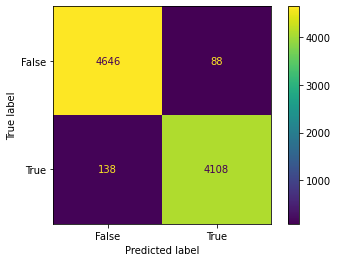

In [99]:
confusion_matrix_randfor = confusion_matrix(label_test, label_pred_randfor)

cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_randfor, display_labels = [False, True])

cm_display.plot()
plt.show() 

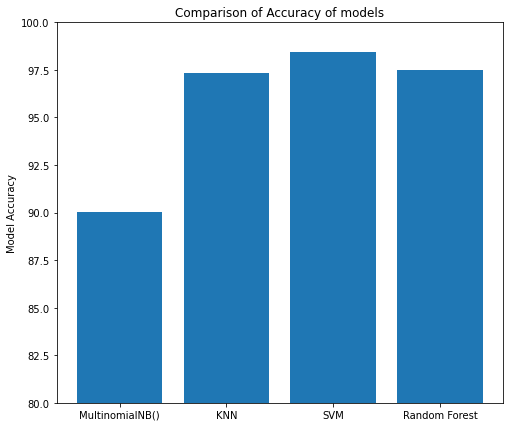

In [100]:
plt.figure(figsize=(8,7))
plt.bar(list(models.keys()),list(models.values()))
plt.ylim(80,100)
plt.ylabel('Model Accuracy')
plt.title('Comparison of Accuracy of models')
plt.show()

# Predictive System

In [112]:
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score >0:
    return 'Positive'

def news_detect(news):
  input_data=punctuation_removal(news)
  #sentiment_analysis
  pol= getPolarity(input_data)
  sent= getAnalysis(pol)
  #vectorisation
  vectorised_input_data=nlp(input_data).vector
  data_2D= vectorised_input_data.reshape(1, -1)
  prediction=sv.predict(data_2D)
  if(prediction==0):
    print("News is Fake!", "\nSentiment: ",sent)
  else:
    print("News is Real", "\nSentiment: ",sent)

In [113]:
news_detect('(Reuters) - Richard Cordray, a Democrat whose resignation as head of the U.S. consumer bureau last month triggered a political battle over who should replace him, plans to run for governor of Ohio, an advisor said on Monday. Cordray will make the announcement at an event on Tuesday at a restaurant in his home town of Grove City, Ohio, said the advisor, who asked to remain anonymous. Cordray will later tour Ohio, meeting with Democratic activists, community leaders and voters, the advisor said. When he resigned last month, Cordray named his deputy to head the Consumer Financial Protection Bureau. But the appointment was mired in turmoil after President Donald Trump assigned White House budget chief Mick Mulvaney to the role. A federal judge last week sided with Trump, but the deputy, Leandra English, is challenging the decision. The 2018 election is to replace Ohio Governor John Kasich, a Republican who cannot seek a third term because of term limits in the pivotal election battleground state. Kasich ran unsuccessfully for president in 2016. Many Democrats have said Cordray, with his reputation for being tough on banks and defending consumers, is their best hope for taking the Ohio governor’s mansion and chipping away at Republicans’ dominance in state government. Several candidates from both the Republican and Democratic parties announced they would run for Ohio governor, according to local media. Cordray delivered a campaign-style speech at a Labor Day celebration in Cincinnnati in September, but at the time he stopped short of saying whether he intended to run for governor. The Ohio native was the first director of the Consumer Financial Protection Bureau, a consumer watchdog agency created under former President Barack Obama in the aftermath of the 2007-2009 financial crisis.  In Washington, Mulvaney on Monday said he has no intention of firing English. ')

News is Real 
Sentiment:  Positive


In [114]:
news_detect("The Odisha pavilion do not won the prestigious 'Special Appreciation Certificate for excellence in display' in the category of 'State Government and Union Territory' on Sunday at the 41st edition of India International Trade Fair(IITF), 2022. held at Pragati Maidan, New Delhi.")

News is Real 
Sentiment:  Positive


In [115]:
news_detect("Last year a mysterious shipment was caught smuggling Coronavirus from Canada. It was traced to Chinese agents working at a Canadian lab. Subsequent investigation by GreatGameIndia linked the agents to Chinese Biological Warfare Program from where the virus is suspected to have leaked causing the Wuhan Coronavirus outbreak.")

News is Real 
Sentiment:  Neutral


In [116]:
news_detect("Israeli Defense Minister: If Pakistan sends ground troops into Syria on any pretext, we will destroy this country with a nuclear attack")

News is Fake! 
Sentiment:  Negative


In [117]:
news_detect("Leonardo DiCaprio donates $10 million to his grandmother's homeland Ukraine")

News is Real 
Sentiment:  Neutral


In [118]:
news_detect("No Reprieve For Consumers As Congress Gives Themselves A Raise & Inflation Expected To Continue Soaring")

News is Fake! 
Sentiment:  Negative


In [119]:
news_detect("Rupaul claims Trump touched him inappropriately in the 1990s")

News is Fake! 
Sentiment:  Neutral


In [120]:
news_detect("President Droupadi Murmu confers Arjuna Award, 2022 on Shri R Praggnanandhaa for his achievements in Chess.")

News is Fake! 
Sentiment:  Neutral


In [121]:
news_detect("From @TheAthleticFC : Nine minutes and 53 seconds. Stoppage time in the U.S. men’s national team's 1-0 win over Iran was agony. Each second felt like an eternity. We documented the experience.")

News is Real 
Sentiment:  Positive


In [122]:
news_detect("Breaking News: Australia 🇦🇺 advanced to the round of 16 in the #FIFAWorldCup with a victory over Denmark 🇩🇰. France 🇫🇷 lost to Tunisia 🇹🇳 but had already clinched advancement. See highlights.")

News is Real 
Sentiment:  Positive
